## Accenture Metrics

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# load a joined dataset
df=pd.read_csv('../data/Gen&Hipp.csv')

In [5]:
#df

In [6]:
#build un-directed graphs
#for members of departments
Du = nx.from_pandas_edgelist(df, source='Address', target='Department') 
#for the Org
Gu = nx.from_pandas_edgelist(df, source='Address', target='To') 

In [7]:
#build a ditected graph
#nx.is_directed(Gu) # will = false
Dd = Du.to_directed()
#nx.is_directed(Gd) # will = true
Gd = Gu.to_directed()

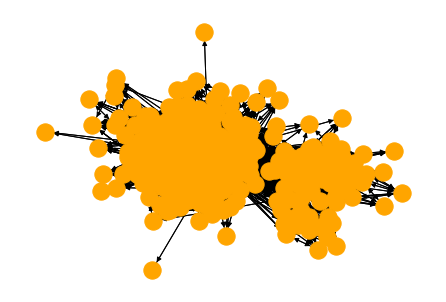

In [8]:
nx.draw(Gd,with_labels=False,node_color='orange')

In [9]:
print (nx.info(Gd))

Name: 
Type: DiGraph
Number of nodes: 292
Number of edges: 8114
Average in degree:  27.7877
Average out degree:  27.7877


In [10]:
print('Diameter of the network =',nx.diameter(Gd))
print('Density of the network =',nx.density(Gd))

Diameter of the network = 4
Density of the network = 0.09549027915077908


### Departments
Not seeing any connections between departments

In [11]:
df['Department'].value_counts()

Talent       5304
Change       1803
HR            412
Analytics     256
Name: Department, dtype: int64

### Graph of departments

In [12]:
Depts = list(df.Department.unique())
people = list(df.Address.unique())
plt.figure(figsize=(10, 10))
layout = nx.spring_layout(Dd,iterations=50)
Dept_size = [Dd.degree(Dept) * 80 for Dept in Depts]
nx.draw_networkx_nodes(Dd, 
                       layout, 
                       nodelist=Departments, 
                       node_size=Dept_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')
# Draw EVERYONE
nx.draw_networkx_nodes(Dd, layout, nodelist=people, node_color='#cccccc', node_size=400)
# Draw POPULAR PEOPLE
popular_people = [person for person in people if Dd.degree(person) >=2]
nx.draw_networkx_nodes(Dd, layout, nodelist=popular_people, node_color='orange', node_size=50)
nx.draw_networkx_edges(Dd, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(Depts, Depts))
nx.draw_networkx_labels(Dd, layout, labels=node_labels)
plt.axis('off')
plt.title("Accenture Departments")
plt.show()

NameError: name 'Departments' is not defined

<Figure size 720x720 with 0 Axes>

### Centrality

In [13]:
print (nx.info(Gd))

Name: 
Type: DiGraph
Number of nodes: 292
Number of edges: 8114
Average in degree:  27.7877
Average out degree:  27.7877


In [15]:
dfc = pd.DataFrame(dict(
    BETWEENNESS_CENTRALITY = nx.betweenness_centrality(Gd),
    DEGREE_CENTRALITY      = nx.degree_centrality(Gd),
    EIGENVECTOR            = nx.eigenvector_centrality(Gd),
    KATZ                   = nx.katz_centrality_numpy(Gd),
    CLOSENESS_CENTRALITY   = nx.closeness_centrality(Gd),
    CLUSTCOEF              = nx.clustering(Gd),
    INDEGREE               = nx.in_degree_centrality(Gd),
    OUTDEGREE              = nx.out_degree_centrality(Gd),
    PAGERANK               = nx.pagerank(Gd, alpha=0.9),
))

dfc.index += 1
dfc.to_csv('metrics2.csv')
dfc

,BETWEENNESS_CENTRALITY,DEGREE_CENTRALITY,EIGENVECTOR,KATZ,CLOSENESS_CENTRALITY,CLUSTCOEF,INDEGREE,OUTDEGREE,PAGERANK
101,0.000500,0.103093,0.024658,-0.045291,0.467095,0.352381,0.051546,0.051546,0.002056
35,0.029917,0.584192,0.133797,-0.122500,0.576238,0.187115,0.292096,0.292096,0.009824
104,0.002568,0.192440,0.058302,-0.001759,0.506087,0.375661,0.096220,0.096220,0.003424
186,0.010672,0.419244,0.116447,0.042193,0.549057,0.304918,0.209622,0.209622,0.006949
102,0.000249,0.096220,0.030375,0.007013,0.457547,0.439560,0.048110,0.048110,0.001874
...,...,...,...,...,...,...,...,...,...
257,0.000156,0.054983,0.009190,0.004677,0.395918,0.678571,0.027491,0.027491,0.001357
254,0.000397,0.089347,0.022897,0.008161,0.430473,0.410256,0.044674,0.044674,0.001794
277,0.000045,0.048110,0.008270,-0.023844,0.378906,0.619048,0.024055,0.024055,0.001156
45,0.000115,0.034364,0.008924,-0.000646,0.406993,0.300000,0.017182,0.017182,0.000884


In [15]:
#Averages
print('Average clustering: ',nx.average_clustering(Gd))

Average clustering:  0.42064384744218225


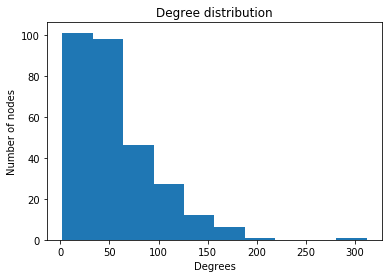

In [37]:
def plot_degree_dist(Gd):
    degrees = [Gd.degree(n) for n in Gd.nodes()]
    plt.hist(degrees)
    plt.xlabel('Degrees')
    plt.ylabel('Number of nodes')
    plt.title('Degree distribution')
    plt.show()

plot_degree_dist(Gd)

75 out of 300 have high distrubution

## Predict edges in a network
Link Prediction is used to predict future possible links in a network

### Adamic Adar Index :
This measure will predict missing links in a Network, according to the amount of shared links between two nodes. \
It will list  3 tuples (u, v, p) where u, v is the new edge and p is the adamic adar index of the new edge u, v.

In [ ]:
# Used with un-direced graph
AADI=(list(nx.adamic_adar_index(Gu))) 
import  csv

with open("AADI.csv","w") as f:
    wr = csv.writer(f,delimiter="\n")
    wr.writerow(AADI)

### Triadic closure
Triadic Closure is a measure of the tendency of edges in a graph to form triangles. It's a measure of the degree to which nodes in a graph tend to cluster together

In [ ]:
# The notebook must be started with "jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000"
# and theis procedure will take up to 30 minutes to complete
e = list(Gd.edges()) 
  
def triadic(e): 
  new_edges = [] 
  
  for i in e: 
    a, b = i 
  
    for j in e: 
      x, y = j 
  
      if i != j: 
        if a == x and (b, y) not in e and (y, b) not in e: 
          new_edges.append((b, y)) 
        if a == y and (b, x) not in e and (x, b) not in e: 
          new_edges.append((b, x)) 
        if b == x and (a, y) not in e and (y, a) not in e: 
          new_edges.append((a, y)) 
        if b == y and (a, x) not in e and (x, a) not in e: 
          new_edges.append((a, x)) 
  
  return new_edges 
  
PRE=(triadic(e)) 
with open("Triadic.csv","w") as f:
    wr = csv.writer(f,delimiter="\n")
    wr.writerow(PRE)